Significant peaks:
Period: 196.96 hours, Power: 0.04
Period: 130.04 hours, Power: 0.91
Period: 99.04 hours, Power: 0.06
Period: 83.80 hours, Power: 0.00
Period: 73.85 hours, Power: 0.02
Period: 64.17 hours, Power: 0.00
Period: 56.89 hours, Power: 0.00
Period: 49.33 hours, Power: 0.00
Period: 42.54 hours, Power: 0.00
Period: 36.59 hours, Power: 0.00
Period: 33.55 hours, Power: 0.00
Period: 30.11 hours, Power: 0.00
Period: 27.12 hours, Power: 0.00
Period: 24.84 hours, Power: 0.00
Period: 23.38 hours, Power: 0.00
Period: 21.42 hours, Power: 0.00
Period: 19.97 hours, Power: 0.00
Period: 19.16 hours, Power: 0.00
Period: 18.18 hours, Power: 0.00
Period: 17.08 hours, Power: 0.00
Period: 16.22 hours, Power: 0.00
Period: 15.36 hours, Power: 0.00
Period: 14.94 hours, Power: 0.00
Period: 14.52 hours, Power: 0.00
Period: 13.86 hours, Power: 0.00
Period: 13.53 hours, Power: 0.00
Period: 13.23 hours, Power: 0.00
Period: 12.97 hours, Power: 0.00
Period: 12.65 hours, Power: 0.00
Period: 12.40 hours, P

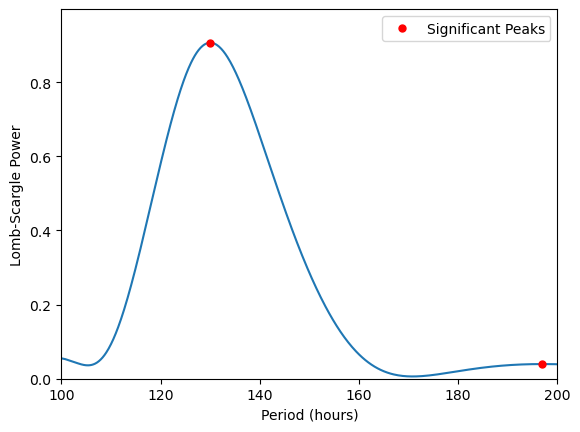

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from astropy.timeseries import LombScargle

data_file = r"C:\Users\nic51\Code_Repos\Tess\Data\Interesting_Curves\sector26\Pulsators\2020nww.txt"
data = np.loadtxt(data_file)
time = data[:, 1]
magnitude = data[:, 4]

ls = LombScargle(time, magnitude)

cadence_minutes = 30
max_frequency = 1 / (cadence_minutes / 60)

frequency = np.linspace(0.1, max_frequency, 10000)
power = ls.power(frequency)
period_hours = 24 / frequency

plt.plot(period_hours, power)
plt.ylim(0, max(power) * 1.1)
plt.xlabel("Period (hours)")
plt.xlim(100,200)
plt.ylabel("Lomb-Scargle Power")

peaks, _ = find_peaks(power, height=0)
print("Significant peaks:")
for peak_index in peaks:
    peak_period = period_hours[peak_index]
    peak_power = power[peak_index]
    print(f"Period: {peak_period:.2f} hours, Power: {peak_power:.2f}")

plt.plot(period_hours[peaks], power[peaks], 'ro', markersize=5, label='Significant Peaks')
plt.legend()
plt.show()